In [3]:
import pandas as pd
import numpy as np

In [4]:
ath_events = pd.read_csv('/Users/wasin/Downloads/athlete_events.csv')

In [160]:
noc_region = pd.read_csv('/Users/wasin/Downloads/noc_regions.csv')
ath_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [161]:
ath_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [162]:
noc_region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [163]:
pip install -U pandasql

Requirement already up-to-date: pandasql in ./opt/anaconda3/lib/python3.8/site-packages (0.7.3)
Note: you may need to restart the kernel to use updated packages.


In [164]:
from pandasql import sqldf

In [165]:
pysqldf = lambda q: sqldf(q, globals())

In [166]:
#Finding null column
nan_values = ath_events.isna()
nan_columns = nan_values.any()
columns_with_nan = ath_events.columns[nan_columns].tolist()
print(columns_with_nan)


['Age', 'Height', 'Weight', 'Medal']


In [7]:
#Create summer events
 
summer_events=ath_events[ath_events.Season=="Summer"]   
print("Numer of rows: ",len(ath_events[ath_events.Season=="Summer"]))
summer_events.head(5)

Numer of rows:  222552


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [168]:
#Create winter events
len(ath_events[ath_events.Season=="Winter"])
winter_events=ath_events[ath_events.Season=="Winter"]
winter_events.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [169]:
#Minimum year in Summer Olympics
sum_min_year=min(summer_events.Year)
print(sum_min_year)
#Maximum year in Summer Olympics
sum_max_year=max(summer_events.Year)
print(sum_max_year)
#Minimum year in Winter Olympics
win_min_year=min(winter_events.Year)
print(win_min_year)
#Maximum year in Winter Olympics
win_max_year=max(winter_events.Year)
print(win_max_year)

1896
2016
1924
2014


In [170]:
#Generate list of year for olympics events
def olympics_year_gen(min_year,max_year):
    year=[min_year]
    for x in range((max_year-min_year)//4):
        year.append((year[x])+4)
    return year

In [171]:
summer_olympics_year=olympics_year_gen(sum_min_year,sum_max_year)
winter_olympics_year1=olympics_year_gen(win_min_year,1992)
winter_olympics_year2=olympics_year_gen(1994,win_max_year)
print(summer_olympics_year)
print(winter_olympics_year1)
print(winter_olympics_year2)

[1896, 1900, 1904, 1908, 1912, 1916, 1920, 1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]
[1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992]
[1994, 1998, 2002, 2006, 2010, 2014]


In [172]:
winter_olympics_year = winter_olympics_year1 + winter_olympics_year2
print(winter_olympics_year)

[1924, 1928, 1932, 1936, 1940, 1944, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1994, 1998, 2002, 2006, 2010, 2014]


In [173]:
#Creating a dataframe to find the mean age, weight and height for each year of summer olympics 

summer_avg = summer_events.groupby('Year')[['Height','Weight','Age']].mean()
summer_avg = summer_avg.astype({'Height':int,'Weight':int,'Age':int})
summer_avg = summer_avg.reset_index()

#Cleaning data for summer olympics

summer_events.Height = summer_events.Height.fillna(summer_events.Year.map(dict(zip(summer_avg.Year, summer_avg.Height))))
summer_events.Weight = summer_events.Weight.fillna(summer_events.Year.map(dict(zip(summer_avg.Year, summer_avg.Weight))))
summer_events.Age = summer_events.Age.fillna(summer_events.Year.map(dict(zip(summer_avg.Year, summer_avg.Age))))
summer_events.Medal = summer_events.Medal.fillna("None")

#Cleaned summer olympics dataset
summer_events.head()

/Users/wasin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,4,Edgar Lindenau Aabye,M,34.0,176.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,None


In [174]:
#Creating a dataframe to find the mean age, weight and height for each year of winter olympics 

winter_avg = winter_events.groupby('Year')[['Height','Weight','Age']].mean()
winter_avg = winter_avg.astype({'Height':int,'Weight':int,'Age':int})
winter_avg = winter_avg.reset_index()

#Cleaning data for winter olympics

winter_events.Height = winter_events.Height.fillna(winter_events.Year.map(dict(zip(winter_avg.Year, winter_avg.Height))))
winter_events.Weight = winter_events.Weight.fillna(winter_events.Year.map(dict(zip(winter_avg.Year, winter_avg.Weight))))
winter_events.Age = winter_events.Age.fillna(winter_events.Year.map(dict(zip(winter_avg.Year, winter_avg.Age))))
winter_events.Medal = winter_events.Medal.fillna("None")

#Cleaned winter olympics dataset
winter_events.head()

/Users/wasin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",None
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,None


In [245]:
#import GDP Dataset
gdp = pd.read_csv('/Users/wasin/Downloads/gdp_csv.csv')
 
gdp = gdp.rename(columns={'Value': 'GDP'} )
gdp = gdp.rename(columns={'Country Code': 'NOC'} )
gdp_avg=gdp.groupby(["NOC","Country Name"]).mean()[["GDP"]].reset_index()
gdp_avg.sort_values(by='GDP',ascending=False) 
 
 

,NOC,Country Name,GDP
249,WLD,World,2.609594e+13
91,HIC,High income,1.950705e+13
175,OED,OECD members,1.926956e+13
191,PST,Post-demographic dividend,1.852443e+13
62,ECS,Europe & Central Asia,8.631478e+12
...,...,...,...
182,PLW,Palau,1.626908e+08
149,MHL,Marshall Islands,1.136514e+08
119,KIR,Kiribati,7.623848e+07
173,NRU,Nauru,7.580117e+07


In [414]:

#Join GDP to Summer_events 
summer_with_gdp=pd.merge(summer_events,gdp_avg,on='NOC',how='left')
summer_with_gdp.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,1.790503e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,1.790503e+12
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,1.357996e+11
3,4,Edgar Lindenau Aabye,M,34.0,176.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1.357996e+11
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,None,Netherlands,3.397308e+11


In [429]:
#Check number of null in "GDP" Column
summer_with_gdp["GDP"].isna().sum()

3554

In [431]:
#Rank most Country with no GDP data available
null=summer_with_gdp[summer_with_gdp.isna().any(axis=1)]

null.groupby(["Team"]).size().reset_index(name='Counts').sort_values(by='Counts',ascending=False).head(20)


,Team,Counts
89,North Korea,670
123,Unified Team,646
131,Uruguay,569
0,Algeria,539
72,Malaysia,510
111,Slovenia,503
80,Mongolia,453
61,Latvia,449
45,Guatemala,410
54,Indonesia,355


In [180]:
#pysqldf("select * from summer_with_gdp where Team like 'Eng%';") 

In [412]:
#Country name
pysqldf("select * from  gdp_avg  where `Country Name` like '%Philippines%';") 

,NOC,Country Name,GDP
0,PHL,Philippines,7.315949e+10


In [428]:
#Country Code
pysqldf("select * from  gdp_avg  where `NOC` like '%PRK%';") 

,NOC,Team,GDP


In [413]:
#Change NOC for gdp dataset
gdp_avg.NOC = gdp_avg.NOC.replace({"DEU": "GER","NLD": "NED","CHE":"SUI","DNK":"DEN","CZE":"TCH","GRC":"GRE","BGR": "BUL","MKD":"YUG","ZAF":"RSA","PRT":"POR","NGA":"NGR","IRN":"IRI","HRV":"CRO","PHL":"PHI" })

In [394]:
#Change NOC for summer_events dataset
summer_events.NOC = summer_events.NOC.replace({"URS": "RUS","GDR":"GER","FRG":"GER","TPE":"CHN","CZE":"TCH","PUR":"PRI"})

/Users/wasin/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [417]:
summer_with_gdp.head() 

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,China,1.790503e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,China,1.790503e+12
2,3,Gunnar Nielsen Aaby,M,24.0,175.0,73.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Denmark,1.357996e+11
3,4,Edgar Lindenau Aabye,M,34.0,176.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,1.357996e+11
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,70.0,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,None,Netherlands,3.397308e+11


In [425]:
#Replace null in GDP with gdp_avg dataframe
gdp_avg = gdp_avg.rename(columns={'Country Name': 'Team'} )
summer_with_gdp.GDP = summer_with_gdp.GDP.fillna(summer_with_gdp.Team.map(dict(zip(gdp_avg.Team, gdp_avg.GDP))))



In [420]:
gdp_avg.head()

,NOC,Country Name,GDP
0,ABW,Aruba,2.036355e+09
1,AFG,Afghanistan,6.226405e+09
2,AGO,Angola,3.791410e+10
3,ALB,Albania,6.011364e+09
4,AND,Andorra,1.468489e+09


In [283]:
#Export Summer events
summer_events.to_csv(r'/Users/wasin/Desktop/Olympics Project/summer_events.csv', index=False,header=True)

In [432]:
#Export summer with GDP
summer_with_gdp.to_csv(r'/Users/wasin/Desktop/Olympics Project/summer_with_gdp.csv', index=False,header=True)

In [285]:
winter_events.to_csv(r'/Users/wasin/Desktop/Olympics Project/winter_events.csv', index=False,header=True)

In [232]:
#Top countries with most participation in summer olympics
top_countries_sum = summer_events.Team.value_counts().sort_values(ascending=False).head(10)
top_countries_sum

United States    14526
Great Britain    10309
France           10021
Italy             8051
Germany           7378
Australia         6976
Canada            6689
Japan             6233
Hungary           6089
Sweden            5821
Name: Team, dtype: int64

In [269]:
#Top countries with most participation in winter olympics
top_countries_win = winter_events.Team.value_counts().sort_values(ascending=False).head(10)
top_countries_win

pandas.core.series.Series

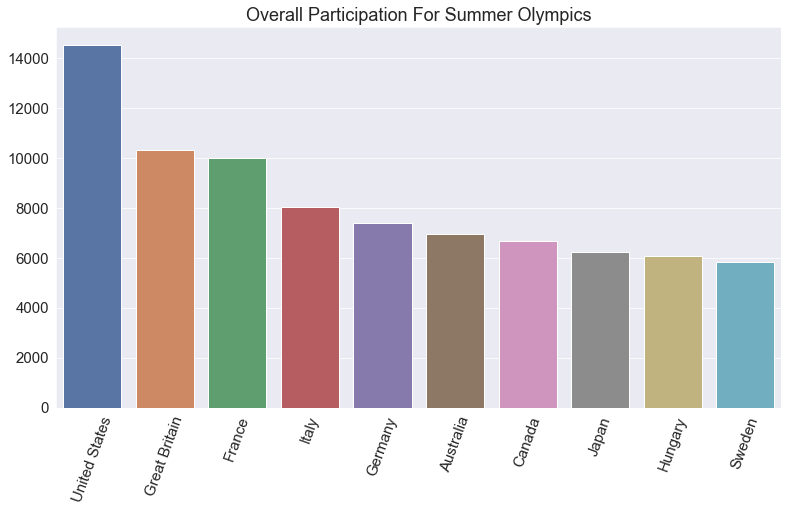

In [278]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
 
sns.set_style('darkgrid')
g.xaxis.label.set_color("white")
g.yaxis.label.set_color("white")


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 15
 
matplotlib.rcParams['figure.figsize'] = (10, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(13,7))
plt.xticks(rotation=70)
plt.title('Overall Participation For Summer Olympics')
 
sns.barplot(x=top_countries_sum.index, y=top_countries_sum.values,palette="deep")


In [16]:
pip install -U seaborn

Requirement already up-to-date: seaborn in ./opt/anaconda3/lib/python3.8/site-packages (0.11.1)
Note: you may need to restart the kernel to use updated packages.


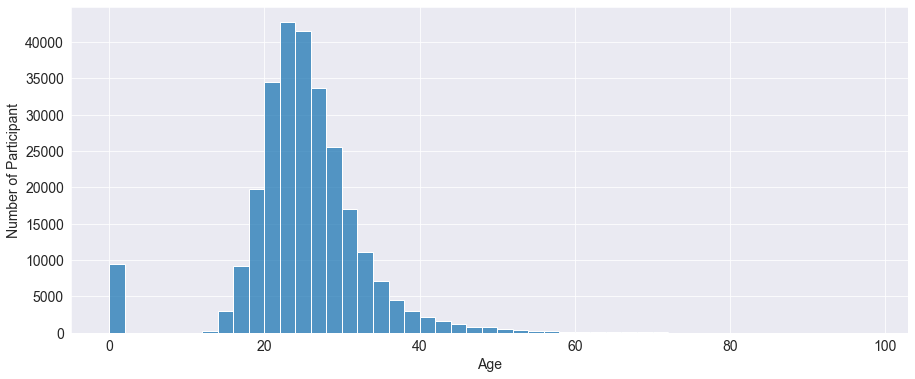

In [17]:
import numpy as np
plt.figure(figsize=(15, 6))
#plt.title(ath_events.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

 
sns.histplot(x='Age',data=ath_events,binwidth=2)

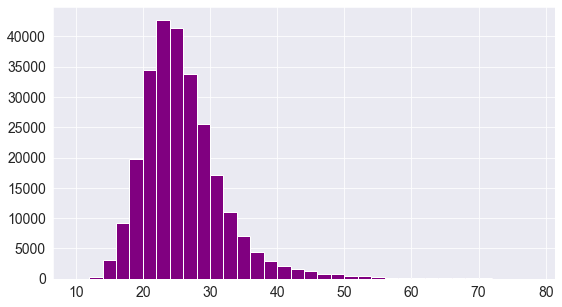

In [18]:
plt.hist(ath_events.Age, bins=np.arange(10,80,2), color='purple');

In [19]:
gender_counts = ath_events.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

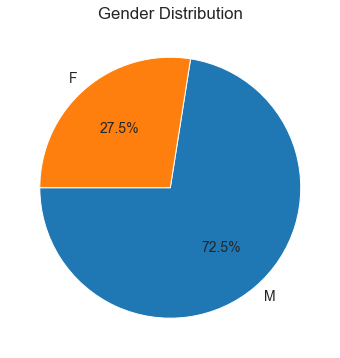

In [20]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [72]:
female_participants = ath_events[(ath_events.Sex=='F') & (ath_events.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [22]:
gold_count=len(ath_events.groupby(['Medal']).groups['Gold'])
gold_count 

13372

In [23]:
silver_count=len(ath_events.groupby(['Medal']).groups['Silver'])
silver_count 

13116

In [24]:
bronze_count=len(ath_events.groupby(['Medal']).groups['Bronze'])
bronze_count 

13295

In [25]:
none_count=len(ath_events.groupby(['Medal']).groups['None'])
none_count 

231333

In [26]:
13295+13116+13372

39783

In [27]:
gold_male=ath_events[ath_events['Medal'] == 'Gold'][ath_events['Sex'] == 'M'].groupby('Name')['Medal'].count().reset_index().sort_values(by=['Medal'],ascending=False) 
gold_male.head()

<ipython-input-27-8fab3ab68c57>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gold_male=ath_events[ath_events['Medal'] == 'Gold'][ath_events['Sex'] == 'M'].groupby('Name')['Medal'].count().reset_index().sort_values(by=['Medal'],ascending=False)


,Name,Medal
4917,"Michael Fred Phelps, II",23
5825,"Raymond Clarence ""Ray"" Ewry",10
4700,Mark Andrew Spitz,9
5447,Paavo Johannes Nurmi,9
2203,"Frederick Carlton ""Carl"" Lewis",9


In [28]:
gold_female=ath_events[ath_events['Medal'] == 'Gold'][ath_events['Sex'] == 'F'].groupby('Name')['Medal'].count().reset_index().sort_values(by=['Medal'],ascending=False) 
gold_female.head()

<ipython-input-28-50c1fdf57937>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gold_female=ath_events[ath_events['Medal'] == 'Gold'][ath_events['Sex'] == 'F'].groupby('Name')['Medal'].count().reset_index().sort_values(by=['Medal'],ascending=False)


,Name,Medal
1301,Larysa Semenivna Latynina (Diriy-),9
258,Birgit Fischer-Schmidt,8
1020,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
2497,Vra slavsk (-Odloilov),7
1567,Maria Valentina Vezzali,6


In [29]:
we_he_me =pysqldf("select Height, Weight,Medal from ath_events where medal = 'Gold' or medal = 'Silver' or medal = 'Bronze' ;") 
we_he_me 

,Height,Weight,Medal
0,175.0,70.6,Gold
1,175.0,70.6,Bronze
2,175.0,70.6,Bronze
3,184.0,85.0,Bronze
4,175.0,64.0,Bronze
...,...,...,...
39778,168.0,80.0,Silver
39779,168.0,80.0,Bronze
39780,182.0,82.0,Bronze
39781,171.0,64.0,Bronze


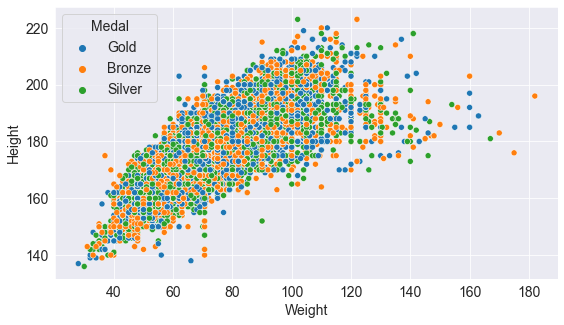

In [30]:
sns.scatterplot(x='Weight', y='Height',data=we_he_me,hue='Medal')

In [31]:
medal_winner= ath_events[(ath_events.Medal == "Gold") | (ath_events.Medal == "Silver") | (ath_events.Medal == "Bronze")]

In [32]:
len(medal_winner.index)

39783

In [36]:
medal_winner.Height.mean()

176.99492245431466

In [38]:
medal_winner.Weight.mean()

73.02732406640504

In [34]:
medal_loser= ath_events[(ath_events.Medal == "None") ]

In [35]:
len(medal_loser.index)

231333

In [37]:
medal_loser.Height.mean()

174.96602300579684

In [39]:
medal_loser.Weight.mean()

70.27473800388637

In [43]:
medal_winner=medal_winner.sort_values(by=['Year'],ascending=False)

In [ ]:
medal_winner.head()

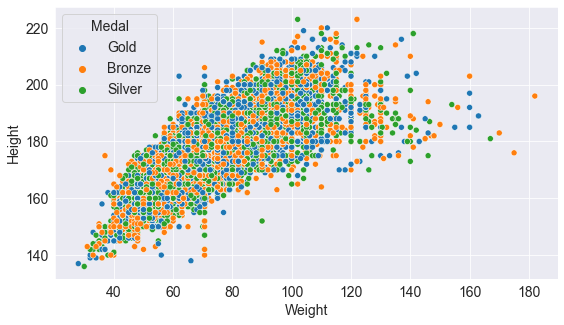

In [40]:
sns.scatterplot(x='Weight',y='Height',data=ath_events,hue='Medal')

In [44]:
ath_over185= ath_events[(ath_events.Height >= 185)]

In [46]:
len(ath_over185.index)

40589

In [50]:
len(ath_over185[(ath_over185.Medal=="Gold")|(ath_over185.Medal=="Silver")|(ath_over185.Medal=="Bronze")].index)

8098

In [51]:
8098/40589

0.1995121831037966

In [47]:
ath_under185= ath_events[(ath_events.Height < 185)]

In [48]:
len(ath_under185.index)

230527

In [52]:
len(ath_under185[(ath_under185.Medal=="Gold")|(ath_under185.Medal=="Silver")|(ath_under185.Medal=="Bronze")].index)

31685

In [53]:
31685/230527

0.1374459390873954

In [103]:
female_summer = ath_events[(ath_events.Sex=='F') & (ath_events.Season=='Summer')] 

In [108]:
len(female_summer)

59443

In [107]:
female_winter = ath_events[(ath_events.Sex=='F') & (ath_events.Season=='Winter')] 

In [109]:
len(female_winter)

15079

In [110]:
female_athlete_summer=female_summer.groupby('Year',as_index=False)[['ID']].count()

In [112]:
female_athlete_winter=female_winter.groupby('Year',as_index=False)[['ID']].count()

In [111]:
female_athlete_summer

,Year,ID
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


In [113]:
female_athlete_winter

,Year,ID
0,1924,17
1,1928,33
2,1932,22
3,1936,81
4,1948,133
5,1952,185
6,1956,246
7,1960,295
8,1964,404
9,1968,416


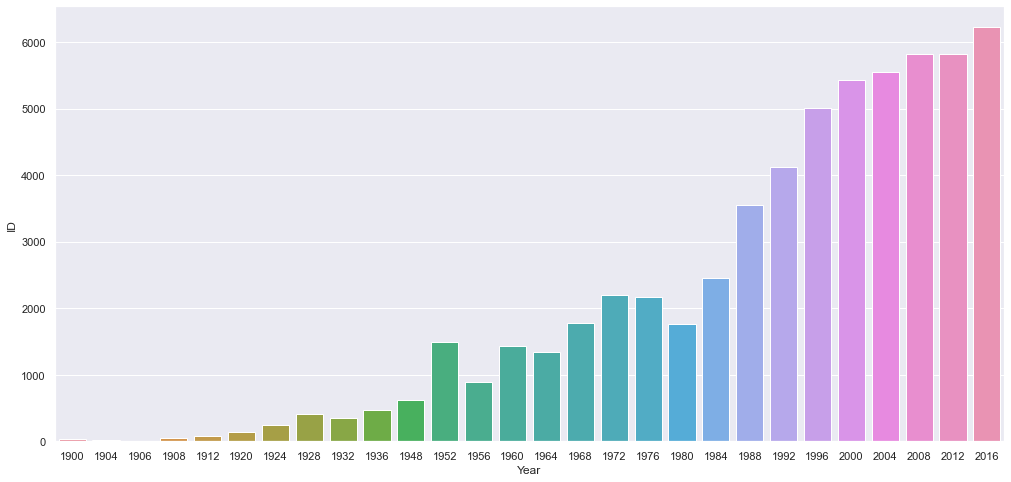

In [114]:
sns.set(rc = {'figure.figsize':(17,8)})
rc=sns.barplot(x='Year',y='ID',data=female_athlete_summer )


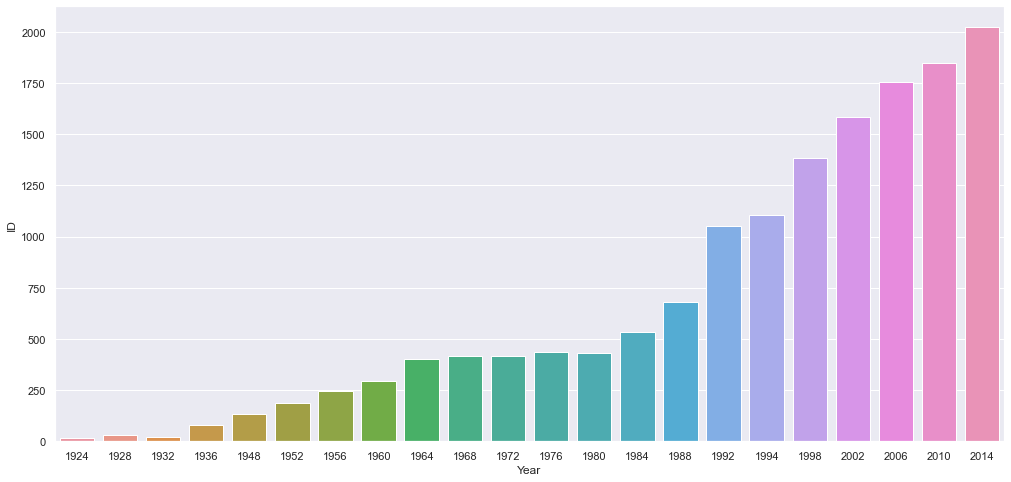

In [115]:
sns.set(rc = {'figure.figsize':(17,8)})
rc=sns.barplot(x='Year',y='ID',data=female_athlete_winter )

